## Part 1 

### Introduction and Project Design

#### Introduction:

Badminton has evolved tremendously in the last decade. In recent years, the spotlight of change is on women's singles where there is an increase in the level of competitiveness. The higher level of competitiveness has led to questions on achieving success in players.

Some questions of interest would be - Is age a derailing factor that undermine performance? Does competition experience lead to a higher winner rate?

This project will examine various women's players' anthropometric characteristics and associated factors such as the number of matches played etc to derive insights.


#### Technique and Methodology:

Firstly, data is manually extracted from the sources (i.e. websites)*. Secondly, python programming will be applied in the preparation of the data. Two comma-separated values (csv) datasets will be merged and a text file will be read. Data cleaning (e.g. column splitting, column adding, creating calculated columns, etc) and manipulation will be performed to derive a clean dataset for analysis work. Third, statistical methodologies such as exploratory data analysis and correlation analysis are used to describe and visualize the data. 

Python libraries used include numpy, pandas, matplotlib, and seaborn. 

*Errors that may occur will be dealt with in the data cleaning process.

#### Limitations:

The study focuses on the current world's top 50 women' singles players as of March 2020. Hence, results may not represent the entire population. Certain information may also not be available from the official source at the point of time.


#### Data Sources:
BWF. 2020. BWF WORLD RANKINGS. [ONLINE] Available at: https://bwfbadminton.com/rankings/. [Accessed 5 June 2020].d over a time frame of less than 2 months

Olympic. 2020. Singles Women. [ONLINE] Available at: https://www.olympic.org/badminton/singles-women. [Accessed 9 June 2020].

Wikipedia. 2020. List of Olympic medalists in badminton. [ONLINE] Available at: https://en.wikipedia.org/wiki/List_of_Olympic_medalists_in_badminton. [Accessed 25 June 2020].


### Data Importing

In [41]:
#dataset 1 contains the top 1 to 25  women's singles ranking data

import pandas as pd
import numpy as np

top_25 = pd.read_csv('Top_25_WS.csv')
top_25.head()

,RANK,COUNTRY / TERRITORY,PLAYER,CHANGE,WIN-LOSE,PRIZE MONEY,POINTS / TMTS,HEIGHT,AGE AS AT 2020,NATIONAL TEAM SINCE,RACKET MANUFACTURER
0,1.0,TPE,TAI Tzu Ying,1,394 - 149,"$1,442,655.00","97,575 / 14",163.0,25.0,2009.0,Victor
1,2.0,CHN,CHEN Yu Fei,1,233 - 76,"$708,995.00","96,465 / 17",171.0,22.0,2013.0,Li Ning
2,3.0,JPN,Akane YAMAGUCHI,0,310 - 111,"$963,417.50","87,220 / 21",156.0,23.0,2012.0,Yonex
3,4.0,JPN,Nozomi OKUHARA,0,312 - 103,"$771,955.50","87,186 / 18",156.0,25.0,2010.0,Mizuno
4,5.0,THA,Ratchanok INTANON,0,396 - 176,"$897,692.50","78,485 / 20",169.0,25.0,2009.0,Yonex


In [42]:
#dataset 2 contains the top 26 to 50 women's singles ranking data

top_26_50 = pd.read_csv('Top_26-50_WS.csv')
top_26_50.head()

,RANK,COUNTRY / TERRITORY,PLAYER,CHANGE,WIN-LOSE,PRIZE MONEY,POINTS / TMTS,HEIGHT,AGE AS AT 2020,NATIONAL TEAM SINCE,RACKET MANUFACTURER
0,26.0,SGP,YEO Jia Min,0,146 - 79,"$36,987.50","40,015 / 20",163.0,21.0,2013.0,Li Ning
1,27.0,SCO,Kirsty GILMOUR,0,266 - 136,"$101,808.00","39,315 / 21",168.0,26.0,2010.0,Victor
2,28.0,THA,Phittayaporn CHAIWAN,0,181 - 61,"$22,883.75","38,852 / 16",NaN,19.0,NaN,Yonex
3,29.0,MAS,Soniia CHEAH,0,125 - 100,"$51,876.50","38,681 / 18",168.0,26.0,2011.0,Victor
4,30.0,HKG,CHEUNG Ngan Yi,1,121 - 136,"$84,585.00","38,610 / 21",NaN,27.0,2010.0,Yonex


In [43]:
#Append dataset 2 to dataset 1

top_50 = ['Top_25_WS.csv', 'Top_26-50_WS.csv']
dataframes = []
for f in top_50:
    dataframes.append(pd.read_csv(f))

top_50 = pd.concat(dataframes,ignore_index=True)

top_50.shape

(55, 11)

In [44]:
# Read olympics text file that contains the age of women players who won the olympic medal 

olympics = 'Badminton_Olympics.txt'

with open(olympics, 'r') as fh:
    for line in fh:
        line = line.rstrip("\n")
        print(line)

CHN Zhang Ning 2008 Gold 33
CHN Zhang Ning 2004 Gold 29
CHN Xie XingFang 2008 Silver 27
IND Maria Karristin 2008 Bronze 23
DEN Camilla Martin 2000 Silver 26
CHN Zhou Mi 2004 Bronze 25
IND Mia Audina 1996 Silver 16
IND Mia Audina 2004 Silver 24
CHN Ye Zhaoying 2000 Bronze 26
CHN Li Xuerui 2012 Gold 21
CHN Wang Yihan 2012 Silver 24
ESP Carolina Marin 2016 Gold 23
JPN Nozomi Okuhara 2016 Bronze 21
IND PV Sindhu 2016 Silver 21
KOR Bang SuHyeon 1996 Gold 23
IND Saina Nehwal 2012 Bronze 22
INA Susi Susanti 1996 Bronze 25


## Part 2

### Data Cleaning and Manipulation

In [45]:
# Standardise all columns head title formatting

top_50.columns = top_50.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

top_50.columns

Index(['rank', 'country_/_territory', 'player', 'change', 'win-lose',
       'prize_money', 'points_/_tmts', 'height', 'age_as_at_2020',
       'national_team_since', 'racket_manufacturer'],
      dtype='object')

In [46]:
# Check and remove empty rows

top_50.dropna(
    axis=0,
    how='all',
    thresh=None,
    subset=None,
    inplace=True
)

top_50.shape


(50, 11)

In [47]:
# Check for abnormalities in numerical values 

top_50.describe()

# There are 50 values in each numerical column which is correct now

# The coefficient of variation (std/mean) of National Team Since column is more than 1, suggesting abnormaility 
# Furthermore, the max of 20150 is incorrect and most likely a typo error 

,rank,height,age_as_at_2020,national_team_since
count,50.00000,36.000000,49.000000,36.000000
mean,25.50000,168.555556,24.306122,2515.055556
std,14.57738,5.390173,3.267288,3023.134891
min,1.00000,156.000000,18.000000,2004.000000
25%,13.25000,165.000000,22.000000,2009.000000
50%,25.50000,169.000000,24.000000,2012.000000
75%,37.75000,172.000000,27.000000,2013.250000
max,50.00000,180.000000,32.000000,20150.000000


In [48]:
# Fix the typo error 

top_50.replace({'national_team_since':{20150:2015}}, inplace=True)

In [49]:
# Typo has been fixed 

top_50.describe()

,rank,height,age_as_at_2020,national_team_since
count,50.00000,36.000000,49.000000,36.000000
mean,25.50000,168.555556,24.306122,2011.305556
std,14.57738,5.390173,3.267288,3.133409
min,1.00000,156.000000,18.000000,2004.000000
25%,13.25000,165.000000,22.000000,2009.000000
50%,25.50000,169.000000,24.000000,2012.000000
75%,37.75000,172.000000,27.000000,2013.250000
max,50.00000,180.000000,32.000000,2016.000000


In [50]:
# Check for null values for all the columns

null_columns = top_50.columns[top_50.isnull().any()]
top_50[null_columns].isnull().sum()

height                 14
age_as_at_2020          1
national_team_since    14
dtype: int64

In [51]:
# Replace null values with average as there are not used for predicting purposes here

top_50.fillna(top_50.mean(), inplace=True)

In [52]:
# There are 50 values in each numerical column which is correct now

top_50.describe()

,rank,height,age_as_at_2020,national_team_since
count,50.00000,50.000000,50.000000,50.000000
mean,25.50000,168.555556,24.306122,2011.305556
std,14.57738,4.555528,3.233776,2.648214
min,1.00000,156.000000,18.000000,2004.000000
25%,13.25000,168.000000,22.000000,2010.000000
50%,25.50000,168.555556,24.000000,2011.305556
75%,37.75000,171.000000,26.750000,2013.000000
max,50.00000,180.000000,32.000000,2016.000000


In [53]:
top_50.head()

,rank,country_/_territory,player,change,win-lose,prize_money,points_/_tmts,height,age_as_at_2020,national_team_since,racket_manufacturer
0,1.0,TPE,TAI Tzu Ying,1,394 - 149,"$1,442,655.00","97,575 / 14",163.0,25.0,2009.0,Victor
1,2.0,CHN,CHEN Yu Fei,1,233 - 76,"$708,995.00","96,465 / 17",171.0,22.0,2013.0,Li Ning
2,3.0,JPN,Akane YAMAGUCHI,0,310 - 111,"$963,417.50","87,220 / 21",156.0,23.0,2012.0,Yonex
3,4.0,JPN,Nozomi OKUHARA,0,312 - 103,"$771,955.50","87,186 / 18",156.0,25.0,2010.0,Mizuno
4,5.0,THA,Ratchanok INTANON,0,396 - 176,"$897,692.50","78,485 / 20",169.0,25.0,2009.0,Yonex


In [54]:
#Split column win-lose into 2 columns

win_lose = pd.DataFrame(top_50['win-lose'].str.split('-',1).tolist(), columns=['win', 'lose'])

win_lose.head(3)

,win,lose
0,394,149
1,233,76
2,310,111


In [55]:
# Append the splitted columns to dataframe

top_50.reset_index(drop=True, inplace=True)
win_lose.reset_index(drop=True, inplace=True)

top_50_concat = pd.concat([top_50, win_lose], axis=1)

In [56]:
top_50_concat.shape

(50, 13)

In [57]:
# Create a new calculated column "Total Matches Played" by firstly converting the object to float in order for calculation

top_50_concat["win"] = top_50_concat.win.astype(float)
top_50_concat["lose"] = top_50_concat.lose.astype(float)

top_50_concat["total_matches_played"] = top_50_concat["win"] + top_50_concat["lose"]

In [58]:
top_50_concat.head(3)

,rank,country_/_territory,player,change,win-lose,prize_money,points_/_tmts,height,age_as_at_2020,national_team_since,racket_manufacturer,win,lose,total_matches_played
0,1.0,TPE,TAI Tzu Ying,1,394 - 149,"$1,442,655.00","97,575 / 14",163.0,25.0,2009.0,Victor,394.0,149.0,543.0
1,2.0,CHN,CHEN Yu Fei,1,233 - 76,"$708,995.00","96,465 / 17",171.0,22.0,2013.0,Li Ning,233.0,76.0,309.0
2,3.0,JPN,Akane YAMAGUCHI,0,310 - 111,"$963,417.50","87,220 / 21",156.0,23.0,2012.0,Yonex,310.0,111.0,421.0


In [59]:
# Create a new calculated column "Winning Rate"

top_50_concat["winning_rate"] = top_50_concat["win"] / top_50_concat["total_matches_played"]

In [60]:
top_50_concat.head(3)

,rank,country_/_territory,player,change,win-lose,prize_money,points_/_tmts,height,age_as_at_2020,national_team_since,racket_manufacturer,win,lose,total_matches_played,winning_rate
0,1.0,TPE,TAI Tzu Ying,1,394 - 149,"$1,442,655.00","97,575 / 14",163.0,25.0,2009.0,Victor,394.0,149.0,543.0,0.725599
1,2.0,CHN,CHEN Yu Fei,1,233 - 76,"$708,995.00","96,465 / 17",171.0,22.0,2013.0,Li Ning,233.0,76.0,309.0,0.754045
2,3.0,JPN,Akane YAMAGUCHI,0,310 - 111,"$963,417.50","87,220 / 21",156.0,23.0,2012.0,Yonex,310.0,111.0,421.0,0.736342


In [61]:
# Add another column "Years of Experience"

top_50_concat["years_of_experience"] = 2020 - top_50_concat["national_team_since"]

In [62]:
top_50_concat

,rank,country_/_territory,player,change,win-lose,prize_money,points_/_tmts,height,age_as_at_2020,national_team_since,racket_manufacturer,win,lose,total_matches_played,winning_rate,years_of_experience
0,1.0,TPE,TAI Tzu Ying,1,394 - 149,"$1,442,655.00","97,575 / 14",163.000000,25.000000,2009.000000,Victor,394.0,149.0,543.0,0.725599,11.000000
1,2.0,CHN,CHEN Yu Fei,1,233 - 76,"$708,995.00","96,465 / 17",171.000000,22.000000,2013.000000,Li Ning,233.0,76.0,309.0,0.754045,7.000000
2,3.0,JPN,Akane YAMAGUCHI,0,310 - 111,"$963,417.50","87,220 / 21",156.000000,23.000000,2012.000000,Yonex,310.0,111.0,421.0,0.736342,8.000000
3,4.0,JPN,Nozomi OKUHARA,0,312 - 103,"$771,955.50","87,186 / 18",156.000000,25.000000,2010.000000,Mizuno,312.0,103.0,415.0,0.751807,10.000000
4,5.0,THA,Ratchanok INTANON,0,396 - 176,"$897,692.50","78,485 / 20",169.000000,25.000000,2009.000000,Yonex,396.0,176.0,572.0,0.692308,11.000000
5,6.0,ESP,Carolina MARIN,1,381 - 112,"$768,253.50","76,210 / 13",172.000000,26.000000,2007.000000,Yonex,381.0,112.0,493.0,0.772819,13.000000
6,7.0,IND,PUSARLA V. Sindhu,1,328 - 140,"$683,780.50","74,474 / 19",179.000000,24.000000,2013.000000,Li Ning,328.0,140.0,468.0,0.700855,7.000000
7,8.0,CHN,HE Bing Jiao,0,212 - 85,"$398,207.50","69,590 / 18",169.000000,23.000000,2013.000000,Li Ning,212.0,85.0,297.0,0.713805,7.000000
8,9.0,KOR,AN Se Young,0,116 - 29,"$126,222.50","64,718 / 24",168.555556,18.000000,2011.305556,Yonex,116.0,29.0,145.0,0.800000,8.694444
9,10.0,CAN,Michelle LI,0,337 - 153,"$204,042.00","62,390 / 20",173.000000,28.000000,2009.000000,Yonex,337.0,153.0,490.0,0.687755,11.000000


In [63]:
# Sanity check for manipulated dataset 

top_50_concat.describe()

,rank,height,age_as_at_2020,national_team_since,win,lose,total_matches_played,winning_rate,years_of_experience
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,168.555556,24.306122,2011.305556,198.980000,107.700000,306.680000,0.644132,8.694444
std,14.57738,4.555528,3.233776,2.648214,96.831115,47.987775,135.066188,0.082311,2.648214
min,1.00000,156.000000,18.000000,2004.000000,66.000000,23.000000,118.000000,0.470817,4.000000
25%,13.25000,168.000000,22.000000,2010.000000,117.250000,72.000000,208.500000,0.580095,7.000000
50%,25.50000,168.555556,24.000000,2011.305556,175.000000,104.500000,281.500000,0.644627,8.694444
75%,37.75000,171.000000,26.750000,2013.000000,249.500000,139.750000,407.250000,0.700321,10.000000
max,50.00000,180.000000,32.000000,2016.000000,433.000000,203.000000,629.000000,0.832117,16.000000


In [64]:
# Rename dataset for clarity

top_50_final = top_50_concat

### Exploratory Data & Statistical Analysis

#### Summary of Key Findings: 

- Taiwan (TPE) has the highest-ranked women player followed by China (CHN) and Japan (JPN). 
- However, the JPN team showed higher consistency in terms of achieving a good winning rate
- Height is mainly distributed around 168cm to 170cm, with a mean of 168.6cm. 
- The age of the majority of players is between the early 20s to late 20s, with a mean of 24.3 years.
- Years of competition experience are centered around 7.5 to 12 years, with a mean of 8.7 years. 
- Contrary to popular belief, the height of a player does not correlate with performance. 
- Correlation analysis shows that there is a positive relationship between age and the number of loss matches at r=0.77. 
- The scatter plot suggests that as players get older, the number of loss matches increased.
- Moreover, the slight negative correlation (-0.3) between age and winning rate added to the support that age is a critical factor in top-flight badminton. 


- Taking reference from the winners of Olympics (1996 Atlanta to 2016 Rio), the mean age of these women badminton Olympians is 24.05 years which is similar to the mean age of the current world top 50. 
- The boxplot of the Olympic data showed an outlier, where China's Zhang Ning won the gold medal in the 2008 Beijing Olympics at 33 years old. 


#### Conclusion and Recommendations:

In top-flight badminton, age is a derailing factor that undermines performance. Age has a strong correlation to the number of loss matches. As a player gets older, her general fitness decline and she is unable to keep up with the strong physical requirements of international competition. 

Coaches should note the golden age for a women player is approximately 24 years old and planning should align to ensure that their players flourish at this age. 

The general retirement age of players is recommended to be approximately 29 years, as there are only a few players in the top 50 who are above 30 years. It is however not impossible to achieve success for older players but such probability is rare in historical records. 

The report could be built on for a more conclusive study. More data could be collected and analyzed. For instance, motor performance data such as running speed and jump height could be incorporated to test correlations with performance results. Such data is unfortunately difficult to acquire due to the involvement of many stakeholders (countries, sports associations, coaches, sports scientists, etc).

The preliminary study of this report should inform coaches and sports governing bodies to enhance success among their players. 


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

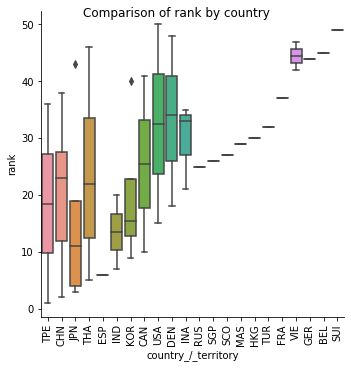

In [66]:
g = sns.catplot(x="country_/_territory",y="rank",data=top_50_final,kind="box")
g.fig.suptitle("Comparison of rank by country")
plt.xticks(rotation=90)
plt.show()

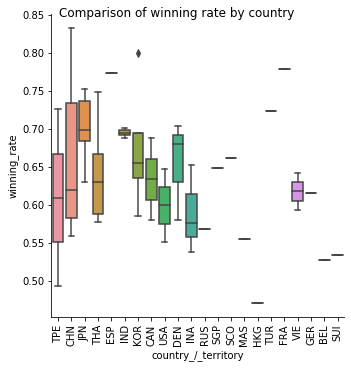

In [67]:
g = sns.catplot(x="country_/_territory",y="winning_rate",data=top_50_final,kind="box")
g.fig.suptitle("Comparison of winning rate by country")
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Height Distribution')

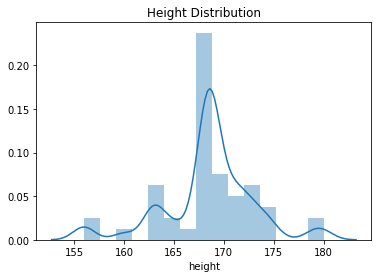

In [68]:
sns.distplot(top_50_final['height'], hist=True).set_title("Height Distribution")

# Highest distribution of height at 168-170cm

Text(0.5, 1.0, 'Age Distribution')

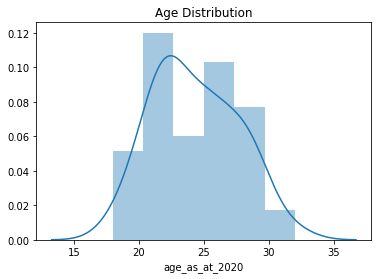

In [69]:
sns.distplot(top_50_final['age_as_at_2020'], hist=True).set_title("Age Distribution")

# Age distribution centered between early 20s to late 20s

Text(0.5, 1.0, 'Years of Experience')

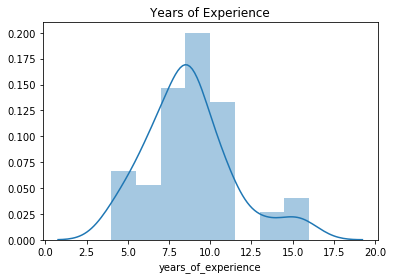

In [70]:
sns.distplot(top_50_final['years_of_experience'], hist=True).set_title("Years of Experience")

# Distribution of years of experience centered around 7.5 to 12 years 

Text(0.5, 1, 'Correlation Matrix')

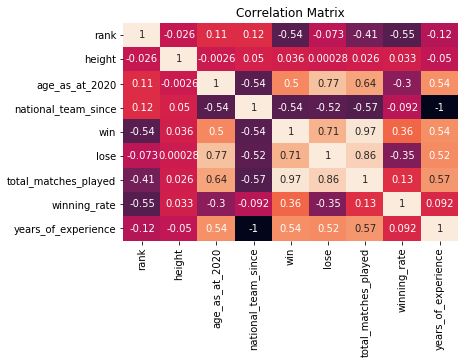

In [71]:
# Correlation Matrix - identify which variables are highly correlated 
# In this case, lose and age --> the higher the age, the more matches they lose. Could be due to
# a number of reasons such as decline in fitness and sport injuries. 
# Find peak performance for age. Age is a critical factor in top level badminton 

sns.heatmap(top_50_final.corr(), annot = True,  cbar=False).set_title("Correlation Matrix")

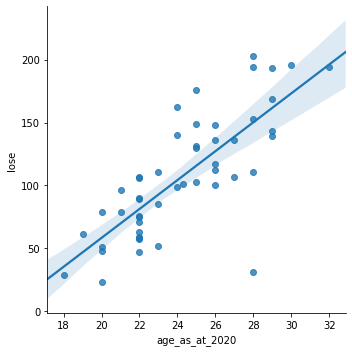

In [72]:
sns.lmplot(x="age_as_at_2020",y="lose",data=top_50_final)

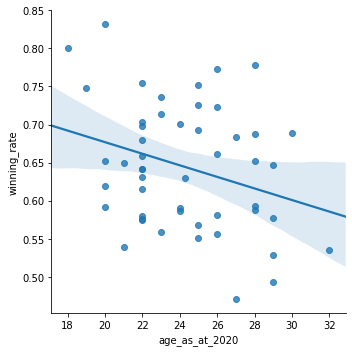

In [73]:
sns.lmplot(x="age_as_at_2020",y="winning_rate",data=top_50_final)

# start axis at 0.0 then zoom in at 0.5

In the following, we will take reference from past Badminton Olympians and examine their ages


In [74]:
# Determine the median age from past Badminton Olympians

olympics_arr = np.loadtxt("Badminton_Olympics.txt", dtype=str)
olympics_arr

array([['CHN', 'Zhang', 'Ning', '2008', 'Gold', '33'],
       ['CHN', 'Zhang', 'Ning', '2004', 'Gold', '29'],
       ['CHN', 'Xie', 'XingFang', '2008', 'Silver', '27'],
       ['IND', 'Maria', 'Karristin', '2008', 'Bronze', '23'],
       ['DEN', 'Camilla', 'Martin', '2000', 'Silver', '26'],
       ['CHN', 'Zhou', 'Mi', '2004', 'Bronze', '25'],
       ['IND', 'Mia', 'Audina', '1996', 'Silver', '16'],
       ['IND', 'Mia', 'Audina', '2004', 'Silver', '24'],
       ['CHN', 'Ye', 'Zhaoying', '2000', 'Bronze', '26'],
       ['CHN', 'Li', 'Xuerui', '2012', 'Gold', '21'],
       ['CHN', 'Wang', 'Yihan', '2012', 'Silver', '24'],
       ['ESP', 'Carolina', 'Marin', '2016', 'Gold', '23'],
       ['JPN', 'Nozomi', 'Okuhara', '2016', 'Bronze', '21'],
       ['IND', 'PV', 'Sindhu', '2016', 'Silver', '21'],
       ['KOR', 'Bang', 'SuHyeon', '1996', 'Gold', '23'],
       ['IND', 'Saina', 'Nehwal', '2012', 'Bronze', '22'],
       ['INA', 'Susi', 'Susanti', '1996', 'Bronze', '25']], dtype='<U9')

In [75]:
ages_sliced = olympics_arr[:,5]
ages_sliced

array(['33', '29', '27', '23', '26', '25', '16', '24', '26', '21', '24',
       '23', '21', '21', '23', '22', '25'], dtype='<U9')

In [76]:
ages_sliced=np.array(ages_sliced,dtype = 'float_')

In [77]:
np.mean(ages_sliced)

24.058823529411764

{'whiskers': [<matplotlib.lines.Line2D at 0x1dbc6f17ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x1dbc6adec50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dbc6ade128>],
 'medians': [<matplotlib.lines.Line2D at 0x1dbc6adef28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dbc6aeb668>],
 'means': []}

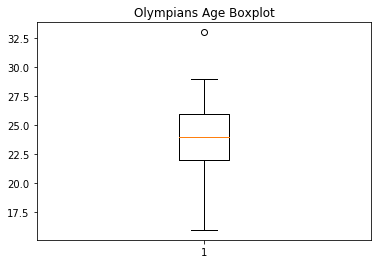

In [78]:
fig1, ax1 = plt.subplots()
ax1.set_title('Olympians Age Boxplot')
ax1.boxplot(ages_sliced)


#### References

BWF. 2020. BWF WORLD RANKINGS. [ONLINE] Available at: https://bwfbadminton.com/rankings/. [Accessed 5 June 2020].d over a time frame of less than 2 months

Olympic. 2020. Singles Women. [ONLINE] Available at: https://www.olympic.org/badminton/singles-women. [Accessed 9 June 2020].

Science Alert. 2017. Anthropometric and Motor Performance Characteristics of Nigerian Badminton Players. [ONLINE] Available at: https://scialert.net/fulltext/?doi=ajsr.2017.244.251. [Accessed 28 June 2020].

Wikipedia. 2020. List of Olympic medalists in badminton. [ONLINE] Available at: https://en.wikipedia.org/wiki/List_of_Olympic_medalists_in_badminton. [Accessed 25 June 2020].